In [12]:
from sklearn.preprocessing import normalize;from sklearn.preprocessing import MinMaxScaler;import sklearn;from sklearn.impute import SimpleImputer;import statsmodels;import statsmodels.api as sm;from statsmodels.tsa.api import VAR
import numpy as np;import matplotlib.ticker as mticker
import scipy as sc;from scipy import linalg;import matplotlib.pyplot as plt;import numpy as np
from numpy import genfromtxt;from scipy.stats import beta
from scipy.stats import norm;from scipy.stats import gamma
from scipy.stats import invgamma;import matplotlib.pyplot as plt
import seaborn as sns;import math;import pandas as pd;import scipy as sc;from sklearn.mixture import GaussianMixture;from sklearn.mixture import BayesianGaussianMixture;import time;
import numpy as np;from sklearn.mixture import GaussianMixture;from sklearn import mixture
m= np.matmul;resh = np.reshape;norm= np.random.standard_normal;inv  = np.linalg.inv ;det = np.linalg.det
import time;import statsmodels.api as sm;from statsmodels.tsa.api import VAR
arr = np.array;zeros = np.zeros
import matplotlib.ticker as mtick
import scipy.io as sio 

In [13]:
### Big Picture:
### How to use Pandas, Matplotlib, and numpy

In [14]:
## The best way to learn how to effectively code, is to just...DO!!!!
### We are going to make a model to predict  output/Inflation growth in Japan ###

#RoadMap:
# 1 Obtain/Read Data
# 2 Massage Data
# 4 Plot Data
# 3 Perform Analysis with Data
# 5 Plot Data


In [15]:
# The path is the address in your computer that python is retrieving the datafrom
path = '/Users/ajay/Desktop/Stuff/Japan/fredgraph/'
df_N = pd.read_csv(path+'Daily_Close.csv')
df_M = pd.read_csv(path+'Monthly.csv')
df_Q = pd.read_csv(path+'Quarterly.csv')


In [66]:
## Let's take a look at what the dataframes look like:
## .head() gives us an overview of the data:
print('Quarterly Data:')
print(df_Q.head())
print(' ')
print('Stock Price Data:')
print(df_N.head())
print(' ')
print('Macroeconomic Data:')
print(df_M.head())


Quarterly Data:
         DATE  QJPN628BIS
0  1955-01-01      2.2115
1  1955-04-01      2.2785
2  1955-07-01      2.3462
3  1955-10-01      2.4327
4  1956-01-01      2.5192
 
Stock Price Data:
         DATE NIKKEI225
0  1949-05-16    176.21
1  1949-05-17    174.80
2  1949-05-18    172.53
3  1949-05-19    171.34
4  1949-05-20    169.20
 
Macroeconomic Data:
         DATE JPNCPIALLMINMEI JPNPROINDMISMEI INTDSRJPM193N
0  1953-01-01               .               .   5.839999999
1  1953-02-01               .               .   5.839999999
2  1953-03-01               .               .   5.839999999
3  1953-04-01               .               .   5.839999999
4  1953-05-01               .               .   5.839999999


In [68]:
print(type(df_Q))

<class 'pandas.core.frame.DataFrame'>


In [94]:
## Lets go over some stuff with Pandas: ##
# Suppose I want to look at the first 5 rows and 2 columns,then
# I would use the: .iloc[row,column] function
#ex: 
row_start = 0
row_end = 5
column_start = 0
column_end = 2
print(df_Q.iloc[row_start:row_end,column_start:column_end])



         DATE  QJPN628BIS
0  1955-01-01      2.2115
1  1955-04-01      2.2785
2  1955-07-01      2.3462
3  1955-10-01      2.4327
4  1956-01-01      2.5192


In [ ]:
## Problem: We need to line all dates together ##
## Solution: Use the merge function in pandas
## Note: not all data is available or lines up clearly with the data, so 
## let's allow for NaNs in the data-set we create, so we can fill in (impute) later
# Let's use: pd.merge
'''
merged_inner = pd.merge(left=df_Q,
                        right= df_N, 
                        left_on='DATE', 
                        right_on = 'DATE',
                        how = 'inner')
'''
#left,right: Left & Right dataframe to use
#left_on,right_on: left_on and right_on 
#how: describes how the data will be combined 
#See the following link: 
#https://www.google.com/search?q=inner+vs+left+vs+right+join&sxsrf=AJOqlzWXPkqBjw3Onl9tbTqfZXBPt6P7zQ:1675200756552&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjm9pWQ4fL8AhUWGTQIHURYBb8Q_AUoAXoECAEQAw&biw=1745&bih=880&dpr=1.1#imgrc=98zIESpVxt_SVM
#


In [138]:
# Define new data frame called merged_inner and apply first merge operaton:
df_final = pd.merge(left=df_Q,right= df_N, left_on='DATE', right_on = 'DATE',how = 'inner')
# Apply second merge operation:
df_final = pd.merge(df_final,right= df_M, left_on='DATE', right_on = 'DATE',how = 'inner')
# Let's look at the data Output:
#df_final = merged_inner.iloc[:,:]
#problem: Not all data has numbers, so we can't plot or perform statistical analysis:
print(df_final.iloc[5:10,3])

# Let's create a new variable to stores all the values in the Dataframe as numbers in an
# array and then 
df_final = df_final.drop_duplicates('DATE')

5    .
6    .
7    .
8    .
9    .
Name: JPNCPIALLMINMEI, dtype: object


In [139]:
# Initialize array to load data into, and let it be a matrix full of zeros that hows the same 
# number of rows except without the date and the same number of columns;
data_m = np.zeros([df_final.shape[1]-1,df_final.shape[0]])

## Double for loop, iterate over the number of rows in the dataframe 
# iterate over the number of columns

# Try, Except: try running line 13, and if it doesnt work (when it hits a row without a number)
# Then hit nans
for j in range(df_final.shape[1]-1):
    for i in range(df_final.shape[0]):
        try:
            # convert the dataframe into a data type composed of a number that is not an integer
            data_m[j,i] = float(df_final.iloc[i,j+1])
        except:
            data_m[j,i] = np.nan


In [140]:
# Create a data frame of only the dates:
DATE = df_final.iloc[:,0]

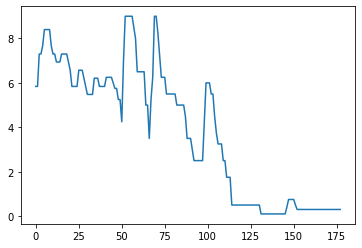

In [141]:
# Label the columns:
# Japanese aggregate home price in Japan:
m_house = 0
# Japanese Stock PriceL
m_s = 1
# Japan CPI
m_pi = 2
# Japan Output 
m_x = 3
# Japan bank reserve rate:
m_i = 4

# How did the Japanese bank reserve rate evolve over time?

plt.plot(data_m[m_i,:])


In [142]:
# Lets see how this evolves with the date on the x-axis
# To do this, we need to use the following python packages:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [145]:
data_m.shape

(5, 194)

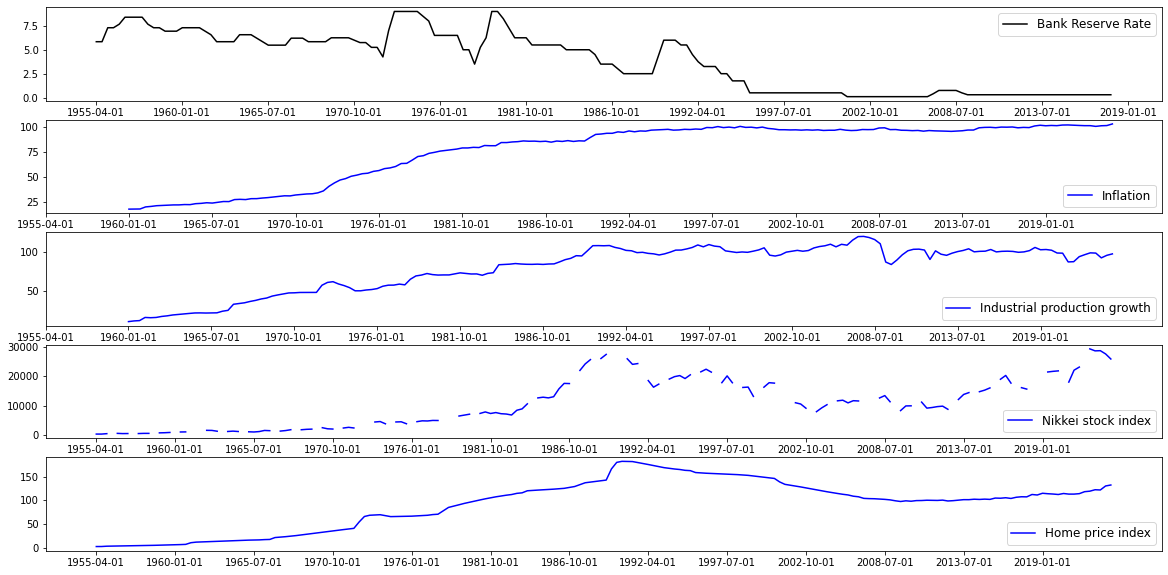

In [149]:
# next let's create an axes:
fig, ax = plt.subplots(5,figsize = (20,10))
# plt.subplots produces fig and ax are outputs
'''
matplotlib.pyplot.subplots(nrows=1, 
ncols=1,figsize = (5,5))
'''
# we have a matrix of differnt plots 
# so having nrows =2,ncols =2 gives us 4 different plots
ax[0].plot(DATE, data_m[m_i,:],color = 'black',label = 'Bank Reserve Rate' )
ax[1].plot(DATE, data_m[m_pi,:],'blue',label = 'Inflation' )   
ax[2].plot(DATE,  data_m[m_x,:],'blue',label = 'Industrial production growth' )
ax[3].plot(DATE,  data_m[m_s,:],'blue',label = 'Nikkei stock index' )
ax[4].plot(DATE,  data_m[m_house,:],'blue',label = 'Home price index' )


X_TICKS = np.arange(0,DATE.shape[0],15)
ax[0].set_xticks(X_TICKS)
ax[1].set_xticks(X_TICKS)
ax[2].set_xticks(X_TICKS)
ax[3].set_xticks(X_TICKS)
ax[4].set_xticks(X_TICKS)


ax[0].legend(loc = 'upper right',prop={'size':12});
ax[1].legend(loc = 'lower right',prop={'size':12});
ax[2].legend(loc = 'lower right',prop={'size':12});
ax[3].legend(loc = 'lower right',prop={'size':12});
ax[4].legend(loc = 'lower right',prop={'size':12});


